In [105]:
# грузим модули
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import seaborn as sns
import sklearn.linear_model as lm
import statsmodels.api as sm
import statsmodels.formula.api as smf

pd.options.display.max_rows = 8

In [118]:
# грузим обработанный и сохранённый на прошлом шаге (EDA) файл. Выводим первые 10 строк посмотреть
fl = pd.read_csv('C://Users/Uldum/Downloads/out.csv')
fl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4971 entries, 0 to 4970
Data columns (total 55 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0.1              4971 non-null   int64  
 1   Unnamed: 0                4971 non-null   int64  
 2   id                        4971 non-null   int64  
 3   premium                   4971 non-null   bool   
 4   name                      4971 non-null   object 
 5   department                136 non-null    object 
 6   has_test                  4971 non-null   bool   
 7   response_letter_required  4971 non-null   bool   
 8   area                      4971 non-null   object 
 9   salary                    4971 non-null   object 
 10  type                      4971 non-null   object 
 11  published_at              4971 non-null   object 
 12  created_at                4971 non-null   object 
 13  archived                  4971 non-null   bool   
 14  insider_

# 1. Структурируйте данные

In [119]:
# предположим, что объект в нашем случае - название вакансии (столбец 'name'), а свойства - остальные столбцы. 
# выведем первые 10 объектов датафрейма
fl.drop(['Unnamed: 0.1', 'Unnamed: 0', 'id', 'premium'], axis=1).head(10)

,name,department,has_test,response_letter_required,area,salary,type,published_at,created_at,archived,...,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,key_skills_json,salary_json,schedule_json
0,Системный администратор,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'from': None, 'to': 39000, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}",2022-04-12T16:21:15+0300,2022-04-12T16:21:15+0300,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Настройка сетевых подключений', 'Администрир...",[],shift
1,Системный администратор,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'from': 35000, 'to': 60000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",2022-04-12T15:34:13+0300,2022-04-12T15:34:13+0300,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Опытный пользователь ПК', 'Работа с оргтехни...",47500.0,fullDay
2,Системный администратор,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'from': 30000, 'to': None, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}",2022-04-06T11:45:39+0300,2022-04-06T11:45:39+0300,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],[],fullDay
3,Системный администратор,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'from': 22000, 'to': None, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}",2022-03-30T17:45:50+0300,2022-03-30T17:45:50+0300,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['ПАК КриптоПро УЦ', 'Контроль доступа', 'Прод...",[],fullDay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,Системный администратор,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",[],"{'id': 'open', 'name': 'Открытая'}",2022-03-22T09:51:27+0300,2022-03-22T09:51:27+0300,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Работа с оргтехникой', 'Информационные техно...",[],fullDay
7,Специалист технической поддержки,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'from': 33000, 'to': 40000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",2022-03-31T16:53:52+0300,2022-03-31T16:53:52+0300,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Деловая переписка', 'Деловое общение']",36500.0,fullDay
8,Инженер-программист,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",[],"{'id': 'open', 'name': 'Открытая'}",2022-04-12T15:59:16+0300,2022-04-12T15:59:16+0300,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['ABAP', 'SAP ERP', 'MS SQL', 'С#', 'С++', 'Ра...",[],fullDay
9,Инженер-программист,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",[],"{'id': 'open', 'name': 'Открытая'}",2022-04-08T15:13:11+0300,2022-04-08T15:13:11+0300,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['C#', 'JavaScript', 'ASP.NET', 'Java', 'CSS']",[],remote


In [ ]:
Интересные для нас колонки: name, salary_json, schedule_json, experience, region  

# 2. Проанализируйте типы данных

In [121]:
# оценим тип данных в нужных колонках в датафрейме 
fl[['name', 'salary_json', 'schedule_json', 'experience', 'region']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4971 entries, 0 to 4970
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4971 non-null   object
 1   salary_json    4971 non-null   object
 2   schedule_json  4971 non-null   object
 3   experience     4971 non-null   object
 4   region         4971 non-null   object
dtypes: object(5)
memory usage: 194.3+ KB


In [ ]:
Типы данных:
    name             категориальный
    salary_json      количественный
    schedule_json    категориальный
    experience       категориальный
    region           категориальный

# 3. Визуализация данных

## Гистограммы




In [122]:
# переводим колонку зарплат в тип данных инт, пустые строки заменяем на ноль
fl['salary_json'] = fl['salary_json'].apply(lambda x: float(x) if x != '[]' else 0)
# отсеиваем из этой колонки нулевые значения и выводим посмотреть
dataframe_sal_notna = fl[fl['salary_json']>0]
dataframe_sal_notna['salary_json'].sample(10)

814      55000.0
3578     70000.0
526      45000.0
2174     27500.0
          ...   
1737    175000.0
14       18445.0
665      45000.0
528      67500.0
Name: salary_json, Length: 10, dtype: float64

Text(0.5, 1.0, 'Salary distribution')

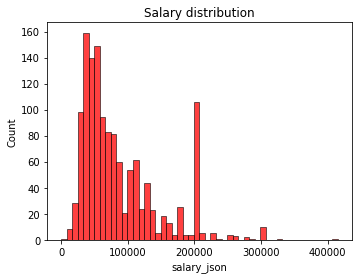

In [110]:
# визуализируем колонку несколькими графиками
f= plt.figure(figsize=(12,4))
ax=f.add_subplot(121)
sns.histplot(dataframe_sal_notna['salary_json'],bins=50,color='r',ax=ax)
ax.set_title('Salary distribution')

In [ ]:
Наиболее часто встречающаяся зарплата в IT-сфере - 40-60 тыс. рублей в месяц.

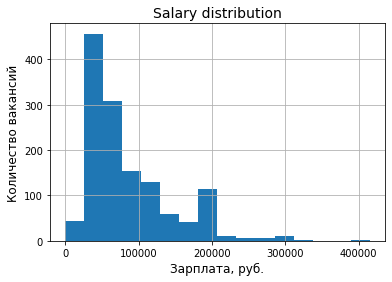

In [111]:
dataframe_sal_notna['salary_json'].hist(bins=16)
plt.title("Salary distribution", fontsize = 14)
plt.ylabel('Количество вакансий', fontsize = 12) 
plt.xlabel('Зарплата, руб.', fontsize = 12) 
plt.show()

In [ ]:
Наиболее часто встречающаяся зарплата - в районе 50.000 рублей в месяц.

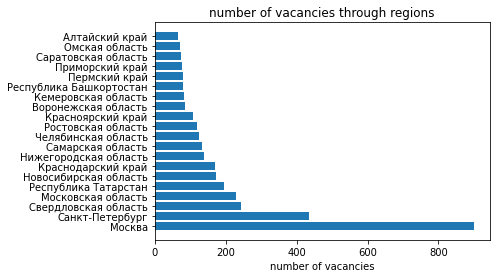

In [112]:
plt.xlabel('number of vacancies')
plt.title('number of vacancies through regions')
plt.barh(fl['region'].value_counts().head(20).index, fl['region'].value_counts().head(20))
plt.show()

In [ ]:
Москва лидирует по числу IT-вакансий с большим отрывом. Среди регионов в лидерах Санкт-Петербург и Свердловская область.

## Круговые диаграммы

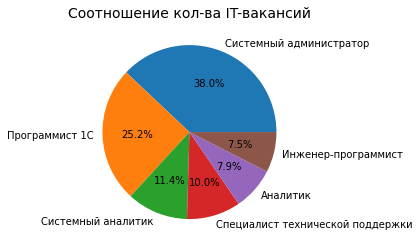

In [113]:
room_count = fl['name'].value_counts()

plt.pie(room_count, labels = room_count.index, autopct='%1.1f%%')
plt.title(label = "Соотношение кол-ва IT-вакансий", fontsize = 14)
plt.show()

In [ ]:
Спрос на Системных администраторов и Программистов 1С среди IT-вакансий выше, чем на остальные специальности.

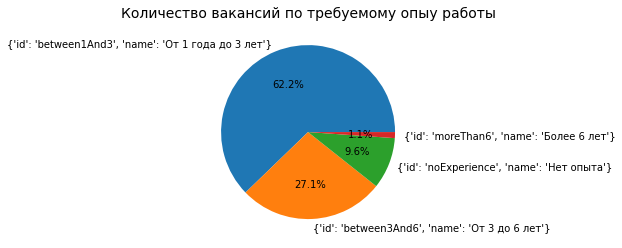

In [114]:
experience_count = fl['experience'].value_counts().head(4)

plt.pie(experience_count, labels = experience_count.index, autopct='%1.1f%%')
plt.title(label = "Количество вакансий по требуемому опыу работы", fontsize = 14)
plt.show()

In [ ]:
Самый распространенный (с большим отрывом) требуемый опыт работы "1-3 года". На втором месте от "3-6 лет". 

# 4. Гипотеза о виде распределения

# Критерий Шапиро-Уилка
> Гипотеза Н0: наблюдаемая выборка принадлежит нормальной генеральной совокупности, уровень значимости полагаем равным 0,05

In [136]:
stats.shapiro(fl[fl['salary_json']>0]['salary_json'])

ShapiroResult(statistic=0.8480770587921143, pvalue=5.3066085346689405e-34)

In [ ]:
Выборка до 5000 (4971) наблюдений. 
При уровне значимости 0.05 и  значении p-value близком к нулю, отвергаем нулевую гипотезу. Выборка не принадлежит
нормальной генеральной совокупности.

## Тест д'Агостино

> вычисляет итоговую статистику на основе данных, а именно, эксцесс и асимметрия, чтобы определить, отклоняется ли распределение данных от нормального распределения, названного по имени Ralph D’Agostino



In [137]:
stats.normaltest(fl[fl['salary_json']>0]['salary_json'])

NormaltestResult(statistic=322.43736994510493, pvalue=9.629743885993822e-71)

In [ ]:
Значение p-value менее 0.05. Отвергаем нулевую гипотезу. Выборка не принадлежит нормальному распределению.

# 5. Оценить связь между показателями

> В зависимости от типов данных, оцените связь между показателями. Используйте:

*   Критерии сравнения групп для анализа связи количественных или порядковых показателей с категориальными.
*   Анализ таблиц сопряженности для оценки связи двух категориальных признаков.
*   Корреляционный анализ Пирсона или Спирмена для количественных или порядковых переменных.

## Критерии сравнения групп 

> Аналз связи количественных или порядковых показателей с категориальными



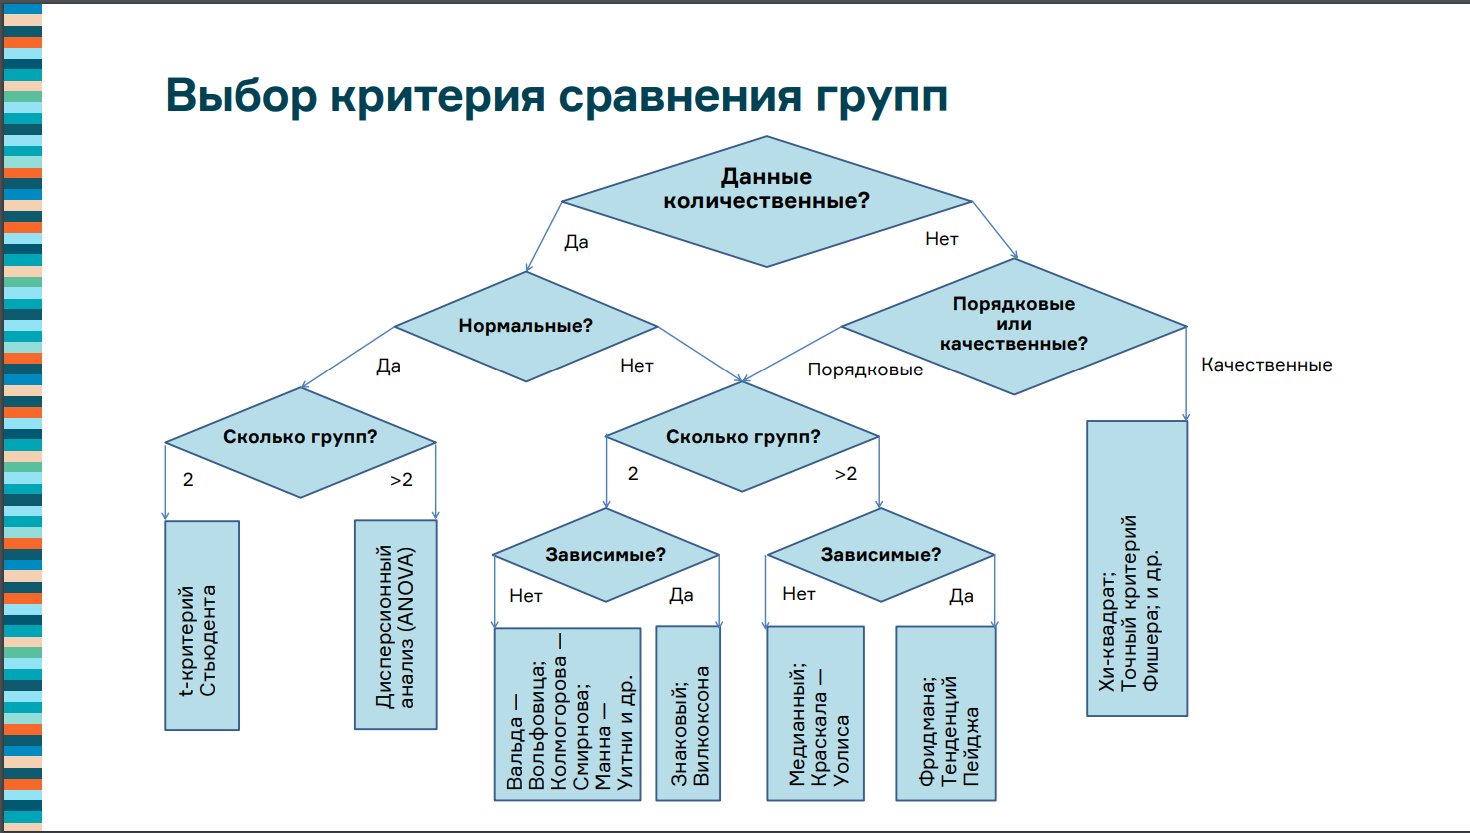

In [ ]:
Применим критерий Краскала-Уолиса, для оценки связи между количественным показателем (заработная плата) и категориальным 
(опыт работы), где категориальных групп более 2. Таким образом, примем нулевую гипотезу о том, что требуемый опыт 
не влияет на размер заработной платы.

In [138]:
dfd1=np.array(fl[fl['experience']=="{'id': 'between1And3', 'name': 'От 1 года до 3 лет'}"]['salary_json'])
dfd2=np.array(fl[fl['experience']=="{'id': 'between3And6', 'name': 'От 3 до 6 лет'}"]['salary_json'])
dfd3=np.array(fl[fl['experience']=="{'id': 'noExperience', 'name': 'Нет опыта'}"]['salary_json'])
dfd4=np.array(fl[fl['experience']=="{'id': 'moreThan6', 'name': 'Более 6 лет'}"]['salary_json'])
stats.mstats.kruskalwallis(dfd1,dfd2,dfd3,dfd4)

KruskalResult(statistic=56.78272636331827, pvalue=2.8595103165329946e-12)

In [ ]:
При уровне значимости 0.05 и полученном p-value близком к нулю, отвергаем нулевую гипотезу. И делаем вывод о том, что
размер заработной платы зависит от требуемого опыта работы.

## Анализ таблиц сопряженности

> Оценки связи двух категориальных признаков

> Метод позволяет оценить статистическую значимость различий двух относительных показателей (частот, долей).







In [ ]:
Оценим связь между опытом работы и штатным расписанием. Нулевая гипотеза: связь между этими данными незначительна. Критерий
    значимости 0.05.

In [139]:
# выведем посмотреть структуру колонки опыта.
fl['experience'].value_counts()

{'id': 'between1And3', 'name': 'От 1 года до 3 лет'}    3079
{'id': 'between3And6', 'name': 'От 3 до 6 лет'}         1341
{'id': 'noExperience', 'name': 'Нет опыта'}              473
{'id': 'moreThan6', 'name': 'Более 6 лет'}                55
                                                        ... 
железа&quot                                                1
Грин Агро-Сахалин&quot                                     1
</li> <li>Внедрение и развитие новых проектов              1
Программист 1С&quot                                        1
Name: experience, Length: 26, dtype: int64

In [140]:
# убираем лишние значения из колонки опыта, оставляем только наиболее распространенные типы расписания (топ-4)
list_exp = list(fl['experience'].value_counts().head(4).index)
groups = fl[fl['experience'].isin(list_exp)]

In [141]:
# смотрим по каким количество предлагаемых типов расписаний по каждой колонке требуемого опыта.
wd=pd.crosstab(groups['schedule_json'], groups['experience']); wd

experience,"{'id': 'between1And3', 'name': 'От 1 года до 3 лет'}","{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","{'id': 'moreThan6', 'name': 'Более 6 лет'}","{'id': 'noExperience', 'name': 'Нет опыта'}"
schedule_json,,,,
flexible,65,25,2,10
flyInFlyOut,4,5,0,1
fullDay,2629,1044,43,420
remote,302,258,10,16
shift,79,9,0,26


<AxesSubplot:xlabel='schedule_json', ylabel='count'>

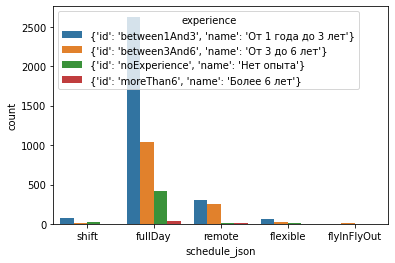

In [142]:
# построим график, чтобы оценить зависимость
sns.countplot(x=groups['schedule_json'], hue=groups['experience'])

In [143]:
# применим критейри хи-квадрат для определения значимости связи
chi2, prob, df, expected = scipy.stats.chi2_contingency(wd)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"
 
print(output.format( chi2, df, prob))

test Statistics: 153.78227935050518
degrees of freedom: 12
p-value: 9.673764297596847e-27



In [ ]:
При заданном критерии значимости (0.05) и полученном p-value близком к нулю, отвергаем нулевую гипотезу. Связь между
требуемым опытом работы и предлагаемым штатным расписанием есть.

# 6. Регрессионная модель

In [ ]:
Построим регрессионную модель зависимости заработной платы от других факторов (регион, опыт работы, штатное расписание,
название вакансии).

In [ ]:
Воспольуемся библиотекой sci-kit.learn.
Итак, колонка 'регион' категориальная и имеет много значений. Оставим только топ-6 регионов, сформировав новый датафрейм.  

In [144]:
# создаем новую переменную со списком регионов-топов по числу вакансий
# оставляем только информацию по этим регионам в датафрейме, в котором убрали нулевые значения зарплаты в предыдущих шагах
list_reg = list(dataframe_sal_notna['region'].value_counts().head(6).index)
df_lr_1 = dataframe_sal_notna[dataframe_sal_notna['region'].isin(list_reg)]

In [145]:
# убираем лишние значения из колонки опыта, используя переменную, которую формировали в предыдущем разделе
# оставляем в датафрейме только нужные колонки, без выбросов
# проверяем поочерёдно все колонки на наличие нетипичных значений
df_lr_1 = df_lr_1[df_lr_1['experience'].isin(list_exp)]
df_lr_1 = df_lr_1[['salary_json', 'region', 'experience', 'schedule_json', 'name']]
df_lr_1

,salary_json,region,experience,schedule_json,name
846,150000.0,Москва,"{'id': 'between1And3', 'name': 'От 1 года до 3...",fullDay,Системный администратор
847,76346.0,Москва,"{'id': 'between1And3', 'name': 'От 1 года до 3...",fullDay,Системный аналитик
849,205000.0,Москва,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}",fullDay,Системный аналитик
863,80000.0,Москва,"{'id': 'between1And3', 'name': 'От 1 года до 3...",fullDay,Аналитик
...,...,...,...,...,...
4293,105000.0,Свердловская область,"{'id': 'between1And3', 'name': 'От 1 года до 3...",fullDay,Программист 1С
4300,81000.0,Свердловская область,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}",fullDay,Программист 1С
4304,90000.0,Свердловская область,"{'id': 'between1And3', 'name': 'От 1 года до 3...",remote,Программист 1С
4305,200000.0,Свердловская область,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}",remote,Программист 1С


In [ ]:
Отлично, теперь переведём категориальные колонки в числовой формат, применив метод dummies из библиотеки sklearn. 

In [43]:
# сформируем список катег. колонок, которые будем переводить
# применяем метод думмис, прописываем в параметрах префиксы, сброс первоначальных колонок и наши данные со списком колонок
categorical_columns = ['region', 'experience', 'schedule_json', 'name']
df_lr_2 = pd.get_dummies(data = df_lr_1, prefix = 'ENC', prefix_sep='_',
               columns = categorical_columns,
               drop_first =True,
              dtype='int8')
df_lr_2

,salary_json,ENC_Москва,ENC_Московская область,ENC_Республика Татарстан,ENC_Санкт-Петербург,ENC_Свердловская область,"ENC_{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","ENC_{'id': 'moreThan6', 'name': 'Более 6 лет'}","ENC_{'id': 'noExperience', 'name': 'Нет опыта'}",ENC_fullDay,ENC_remote,ENC_shift,ENC_Инженер-программист,ENC_Программист 1С,ENC_Системный администратор,ENC_Системный аналитик,ENC_Специалист технической поддержки
846,150000.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
847,76346.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
849,205000.0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
863,80000.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4293,105000.0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4300,81000.0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0
4304,90000.0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
4305,200000.0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0


In [ ]:
Осталось всего 530 наблюдений для обучения и проверки модели. Построим тепловую карту корреляций признаков, чтобы убедиться,
что всё в порядке хотя бы с этим остатком данных.

<AxesSubplot:>

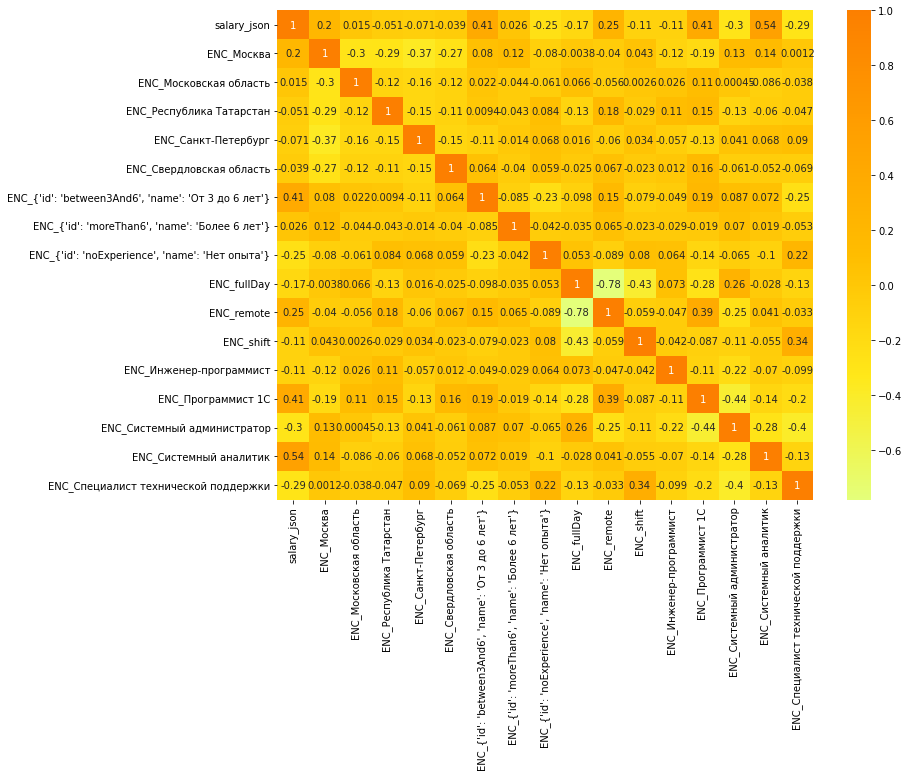

In [44]:
plt.figure(figsize=(12, 9))
corr = df_lr_2.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True)

In [ ]:
Сильных корреляций не наблюдается, попробуем теперь построить модель на этих данных.

In [46]:
# Обучим модель. Данные нужно разделить на тестовые и тренировочные
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# сплитим данные на признаки и целевую переменную (salary)
X = df_lr_2.drop(['salary_json'], axis = 1)  # данные без целевой переменной
y = df_lr_2.salary_json          # данные с целевой переменной (ответы)
y                          # выводим посмотреть что там, на всякий случай

846     150000.0
847      76346.0
849     205000.0
863      80000.0
          ...   
4293    105000.0
4300     81000.0
4304     90000.0
4305    200000.0
Name: salary_json, Length: 530, dtype: float64

In [53]:
# сплитим данные на тренировочные и тестовые методом .train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 4, test_size = 0.15)

In [ ]:
Данные сформированы и разделены на тестовые и тренировочные, на признаки и целевую колонку. Воспользуемся эстиматором 
Ridge regression из библиотеки sklearn. Также применим метод поиска сетки лучших параметров кросс-валидации GridSearch CV.

In [61]:
# задаём диапазоны параметров, которые относятся к эстиматору Ридж, но пойдут в параметры поисковой сетки GridSearch
# задан диапазон параметров с шагом, чтобы быстрее обучалось (можно точнее)
# по параметрам читаем документацию для Ридж-регрессии
parameters = {'alpha':[0.1, 10, 0.5], 'fit_intercept': [True, False], 'normalize': [True, False],
              'max_iter': [100, 10000, 500], 'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'],
             'random_state': [0, 20, 4]} 
# подгружаем Ридж, ГридСёрч и создаём экземпляр класса модели Ридж
# также отключаем ворнинги
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
model = Ridge()

In [62]:
# закидываем в сетку Грид наш эстиматор, его параметры, сравнительный показатель (scoring), задаём число фолдов для кросс-валидации
# по поводу scoring. Сначала я пытался сравнивать по mean_squared_error (без neg_), но потом понял, что поисковая
# сетка не понимает как сравнивать один показатель с другим (какой лучше, какой хуже), поэтому надо добавить neg_ - ниже - лучше
# и на основании этого показателя уже выстраивать иерархию эстиматоров, которые сетка наобучала
Ridge_reg= GridSearchCV(model, parameters, scoring='neg_mean_squared_error', cv=5)
# фитим выборки в ридж-сетку
Ridge_reg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 10, 0.5],
                         'fit_intercept': [True, False],
                         'max_iter': [100, 10000, 500],
                         'normalize': [True, False], 'random_state': [0, 20, 4],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga', 'lbfgs']},
             scoring='neg_mean_squared_error')

In [63]:
# выводим лучший подобранный сеткой эстиматор с лучшими параметрами по показателю скоринга (квадрата отклонений)
Ridge_reg.best_estimator_

Ridge(alpha=0.5, max_iter=100, normalize=False, random_state=0, solver='lsqr')

In [64]:
# выводим точность лучшего эстиматора, используя тестовые отложенные выборки
Ridge_reg.best_estimator_.score(X_test,y_test)

0.7510030954791607

In [ ]:
Вывод:
    75% точности, лучше, чем 50 на 50. Получается, что выбранные нами признаки в большинстве случаев оказывают влияние на 
    размер заработной платы.
Возможные способы улучшения точности: отбор только релевантных признаков.    

# 7. Классификация и нейросеть. (на доработке)

In [ ]:
Попробуем обучить нейросеть предсказаниям (классификации) по специальностям в зависимости от признаков: 
штатное расписание, 
заработная плата, 
ключевые навыки
Задумка в том, чтобы выделить ключевые навыки (3 на каждую специализацию), применить метод думмис, который разделит 
категориальные признаки на числовые по колонкам, как в разделе линейной регрессии.
Затем нормализуем данные, сплитим на проверочные и обучающие, на вопросы и ответы. Потом с помощью TensorFlow Keras
зададим модель последовательных слоёв нейронов и обучим её, подобрав функции активации и оптимизатор, ориентируясь на 
лосс. 

In [99]:
# сформируем датафрейм из датафрейма из предыдущих степов по нужным колонкам
df_nn_1 = dataframe_sal_notna[['salary_json', 'schedule_json', 'name', 'key_skills_json']]
df_nn_1

,salary_json,schedule_json,name,key_skills_json
1,47500.0,fullDay,Системный администратор,"['Опытный пользователь ПК', 'Работа с оргтехни..."
4,35000.0,fullDay,Системный администратор,"['Настройка сетевых подключений', 'Настройка П..."
7,36500.0,fullDay,Специалист технической поддержки,"['Деловая переписка', 'Деловое общение']"
13,31500.0,fullDay,Инженер-программист,"['Linux', 'Python', 'Работа с базами данных', ..."
...,...,...,...,...
4960,90000.0,fullDay,Инженер-программист,['Добросовестность']
4961,82500.0,remote,Программист 1С,[]
4963,30000.0,fullDay,Инженер-программист,[]
4968,200000.0,remote,Программист 1С,"['Ответственность', 'Клиентоориентированность']"


In [ ]:
Видно проблему в колонке ключевых навыков. Разобьём навыки на отдельные колонки.

In [100]:
df_nn_1['key_skills_json'].apply(lambda x: list(x).sort())
df_nn_1['key_skills_json']
df_nn_1 = df_nn_1['key_skills_json'].str.split(',',expand=True)
df_nn_1

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
1,['Опытный пользователь ПК','Работа с оргтехникой','Знание офисных и почтовых программ','Ремонт ПК','Настройка ПК'],None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,['Настройка сетевых подключений','Настройка ПО','Информационная безопасность','Администрирование сетевого оборудования','Технические средства информационной защиты'],None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
7,['Деловая переписка','Деловое общение'],None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
13,['Linux','Python','Работа с базами данных','ORACLE','Delphi'],None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4960,['Добросовестность'],None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4961,[],None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4963,[],None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4968,['Ответственность','Клиентоориентированность'],None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [104]:
df_nn_1[[0, 1]].value_counts()

0                                            1                                        
['Ответственность'                            'Клиентоориентированность']                 89
['1С программирование'                        '1С: Предприятие 8'                         44
['Настройка ПК'                               'Настройка ПО'                              19
['Active Directory'                           'Администрирование серверов Windows'        17
                                                                                          ..
['SQL'                                        'Atlassian Confluence'                       1
                                              '1С программирование'                        1
['SOAP'                                       'REST'                                       1
['умение работать в режиме многозадачности'   'навыки межличностного делового общения'     1
Length: 611, dtype: int64

In [ ]:
К сожалению я не смог придумать способ сгруппировать навыки таким образом, чтобы они отражали суть специализации.
Если бы работодатели указывали ключевые навыки, то было бы всё просто, но навыки идут вперемешку в лексиграфическом порядке
и не факт, что первый (или даже второй, третий) навык в списке - ключевой.
Без ключевых навыков обучение нейросети не имеет смысла.
Чтож, возможно, когда-нибудь я решу эту проблему.